In [7]:

from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
from sklearn import datasets as ds
from sklearn import model_selection
import numpy as np
import matplotlib as mp
import jupyter
import math
import matplotlib.pyplot as plt
from math import exp,log
import random
from random import randint

mem = Memory("./mycache")

@mem.cache
def get_data(mysvmlightfile):
    data = load_svmlight_file(mysvmlightfile)
    return data[0], data[1]
x_train,y_train=get_data('a9a.txt')
x_train=x_train.toarray()
x_train=np.hstack((x_train,np.ones([np.shape(x_train)[0],1])))
y_train=y_train.reshape(np.shape(y_train)[0],1)
x_test,y_test=ds.load_svmlight_file("a9a.t",n_features=123)
x_test=x_test.toarray()
x_test=np.hstack((x_test,np.ones([np.shape(x_test)[0],1])))
y_test=y_test.reshape(np.shape(y_test)[0],1)

n=np.shape(x_train)[0]
m=np.shape(x_train)[1]

def loss(X,Y,W,C):
    l=0
    n,m=np.shape(X)
    for i in range(n):
        l+=max(0,1-Y[i]*W.T.dot(X[i]))
    l/=n
    l*=C
    l+=(W.T.dot(W)/2)[0][0]
    return l[0]

def gradient(X,Y,W,C):
    g=np.zeros(np.shape(W))
    m,n=np.shape(X)
    M=np.zeros((m,1))
    for i in range(m):
        if 1-Y[i]*(W.T.dot(X[i]))>=0:
            M[i][0]=1
    Y=M*Y
    g=W-C*X.T.dot(Y)
    return g
#NAG初始化
W_NAG=np.zeros((m,1))
L_NAG=[]
eta_NAG=1e-6
gamma_NAG=1e-5
batch_NAG=100
C=10
v=0
#RMSProp初始化
W_RMS=np.zeros((m,1))
L_RMSProp=[]
eta_RMS=1e-3
gamma_RMS=0.9
epsilon_RMS=1e-6
batch_RMS=100
C=10
G=0
#AdaDelta 初始化
W_ADA=np.zeros((m,1))
L_AdaDelta=[]
gamma_ADA=0.95
epsilon_ADA=1e-8
batch_ADA=100
C=10
G=0
dt=0

#adam 初始化
W_ADAM=np.zeros((m,1))
L_Adam=[]
beta_ADAM=0.9
gamma_ADAM=0.99
eta_ADAM=1e-4
epsilon_ADAM=1e-8
batch_ADAM=100
C=10
M=0
#NAG Training
for epoch in range(300):
    random.seed()
    i=random.randint(0,n-1-batch_NAG)
    g=gradient(x_train[i:i+batch_NAG].reshape((batch_NAG,m)),y_train[i:i+batch_NAG].reshape((batch_NAG,1)),W_NAG-gamma_NAG*v,C)
    v=gamma_NAG*v+eta_NAG*g
    W_NAG=W_NAG-v
    l_test=loss(x_test,y_test,W_NAG,C)
    L_NAG.append(l_test)
print("L_NAG")
print(L_NAG) 

#RMS Training
for epoch in range(300):
    random.seed()
    i=random.randint(0,n-1-batch_RMS)
    g=gradient(x_train[i:i+batch_RMS].reshape((batch_RMS,m)),y_train[i:i+batch_RMS].reshape((batch_RMS,1)),W_RMS,C)
    G=gamma_RMS*G+(1-gamma_RMS)*(g*g)
    W_RMS=W_RMS-eta_RMS/np.sqrt(G+epsilon_RMS)*g
    l_test=loss(x_test,y_test,W_RMS,C)
    L_RMSProp.append(l_test)
print("L_RMSProp") 
print(L_RMSProp) 

#Adadelta training
for epoch in range(300):
    random.seed()
    i=random.randint(0,n-1-batch_ADA)
    g=gradient(x_train[i:i+batch_ADA].reshape((batch_ADA,m)),y_train[i:i+batch_ADA].reshape((batch_ADA,1)),W_ADA,C)
    G=gamma_ADA*G+(1-gamma_ADA)*g*g
    dw=-np.sqrt(dt+epsilon_ADA)/np.sqrt(G+epsilon_ADA)*g
    W_ADA=W_ADA+dw
    dt=gamma_ADA*dt+(1-gamma_ADA)*dw*dw
    l_test=loss(x_test,y_test,W_ADA,C)
    L_AdaDelta.append(l_test)
print("L_AdaDelta") 
print(L_AdaDelta) 

#adam training
for epoch in range(300):
    i=random.randint(0,n-1-batch_ADAM)
    g=gradient(x_train[i:i+batch_ADAM].reshape((batch_ADAM,m)),y_train[i:i+batch_ADAM].reshape((batch_ADAM,1)),W_ADAM,C)
    M=beta_ADAM*M+(1-beta_ADAM)*g
    G=gamma_ADAM*G+(1-gamma_ADAM)*g*g
    alpha=eta_ADAM*np.sqrt(1-math.pow(gamma_ADAM,epoch))/(1-beta_ADAM)
    W_ADAM=W_ADAM-alpha*M/np.sqrt(G+epsilon_ADAM)
    l_test=loss(x_test,y_test,W_ADAM,C)
    L_Adam.append(l_test)
print("L_Adam") 
print(L_Adam) 



L_NAG
[9.9779821046163377, 9.954506942974664, 9.9340358383658902, 9.9118880948255086, 9.8954032014605495, 9.8689347459515648, 9.8467786308018201, 9.8198753227133011, 9.7983080188819081, 9.7710609227166128, 9.7509221304087053, 9.7272990513846818, 9.7088327453362044, 9.684796095537795, 9.6672489123368663, 9.648182472744768, 9.6256150284751634, 9.6042141481235728, 9.5819230750775262, 9.5570853029207274, 9.529931506433245, 9.5050767578644972, 9.4860638844061533, 9.4670435114473062, 9.4422828361142876, 9.4170037587286295, 9.3979908854945648, 9.3795082418180531, 9.3645693210190046, 9.3448991103131576, 9.3275096793033203, 9.309542655242744, 9.2913377393379317, 9.2731954755515442, 9.2516149087036279, 9.2390777064939762, 9.2180725292431216, 9.2011177042987793, 9.1822319901863292, 9.1584964486837386, 9.1329865224538977, 9.1080850715653394, 9.0875642052345214, 9.0596559696271299, 9.0406628365403279, 9.0140111264326368, 8.9905065771116632, 8.9644790091666167, 8.9407212799033289, 8.9185406531051878

L_AdaDelta
[9.974242104726601, 9.9485408155035007, 9.9265334543565213, 9.9104732191271037, 9.8880441620940918, 9.857483040859071, 9.8317970833498727, 9.8070417893732209, 9.7798188315317898, 9.7505097410703456, 9.7268377692706718, 9.7003558321217014, 9.6695039444330089, 9.6362414162994057, 9.61429444906641, 9.586782866230843, 9.5635925972679061, 9.5358493765831973, 9.509535265843251, 9.4839206394589066, 9.4489248734366615, 9.4241445404156199, 9.3950704990870726, 9.3594264637849172, 9.3339149043025902, 9.3007184050692633, 9.2664765110949023, 9.2386263698114508, 9.2160315645489597, 9.1834063909194761, 9.1563531910362368, 9.1288660419352183, 9.1005488473242604, 9.0722242204169685, 9.0384845707827086, 9.0039367204333622, 8.9692608147674786, 8.9406579362518102, 8.9076418582794741, 8.874372477362952, 8.8462874390143682, 8.8196274224139568, 8.7925824064605163, 8.7654748233450412, 8.7371370596217357, 8.7092910397814798, 8.679746484225177, 8.6533025365261214, 8.6271422683419559, 8.59586227443627

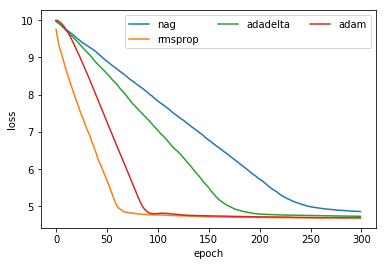

In [8]:
plt.xlabel('epoch')
plt.ylabel('loss')
time_list=[i for i in range(300)]
line1=plt.plot(time_list,L_NAG)
line2=plt.plot(time_list,L_RMSProp)
line3=plt.plot(time_list,L_AdaDelta)
line4=plt.plot(time_list,L_Adam)
label = ["nag","rmsprop","adadelta","adam"]
plt.legend(label, loc = 0, ncol = 3)
plt.show()